In [30]:
# (c) Sydney Sedibe, 2018

import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # Seaborn for pairplots

# Set text size
plt.rcParams['font.size'] = 18

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

file_list = os.listdir("./")
print(file_list)

['.git', '.ipynb_checkpoints', 'CompleteDataset.csv', 'kernel.ipynb', 'README.md']


**This dataset contains information about Players from the EA Sports game, FIFA 18. We will take this data, clean it, analyse it, and gain insights from it. First let's load the data.**

In [31]:
odf = pd.read_csv("CompleteDataset.csv") # odf = original dataframe with complete dataset
odf.columns

Index(['Unnamed: 0', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'GK diving', 'GK handling', 'GK kicking',
       'GK positioning', 'GK reflexes', 'Heading accuracy', 'Interceptions',
       'Jumping', 'Long passing', 'Long shots', 'Marking', 'Penalties',
       'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

**Now, let's inspect it...**

In [32]:
def showDetails(df):
    print("-------------------------------------------------------------------------------------------------------------------")
    print('{:>35}'.format("Shape of dataframe:") + '{:>12}'.format(str(df.shape)))
    containsNulls = "Yes" if df.isnull().any().any() else "No"
    print("Does dataframe contain null values: " + containsNulls)
    null_columns = df.columns[df.isnull().any()]
    print("Number of columns with null values: " + str(df[null_columns].isnull().any().sum()))
    null_rows = df[df.isnull().any(axis=1)][null_columns]
    print("Number of records with null values: " + str(len(null_rows)))
    print('{:>35}'.format("Percentage of null records:") + '{:>6.2f}'.format(len(null_rows) / len(df) * 100) + "%")
    print("-------------------------------------------------------------------------------------------------------------------")

showDetails(odf)

-------------------------------------------------------------------------------------------------------------------
                Shape of dataframe: (17981, 75)
Does dataframe contain null values: Yes
Number of columns with null values: 27
Number of records with null values: 2235
        Percentage of null records: 12.43%
-------------------------------------------------------------------------------------------------------------------


**Our dataframe contains 17 981 records, with 75 columns. There are 27 columns and 2 235 records with null values, and these null records account for 12.43% of the total number of records .**

**Let's inspect these null records to see if we can find the source of the missing data...**

In [33]:
nv_df = odf[odf.isnull().any(axis=1)] # nv_df ==> null value dataframe
showDetails(nv_df)
nv_df.head()

-------------------------------------------------------------------------------------------------------------------
                Shape of dataframe:  (2235, 75)
Does dataframe contain null values: Yes
Number of columns with null values: 27
Number of records with null values: 2235
        Percentage of null records:100.00%
-------------------------------------------------------------------------------------------------------------------


,Unnamed: 0,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
4,4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,De Gea,26,https://cdn.sofifa.org/48/18/players/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,90,92,Manchester United,https://cdn.sofifa.org/24/18/teams/11.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,T. Courtois,25,https://cdn.sofifa.org/48/18/players/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,92,Chelsea,https://cdn.sofifa.org/24/18/teams/5.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,G. Buffon,39,https://cdn.sofifa.org/48/18/players/1179.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,20,J. Oblak,24,https://cdn.sofifa.org/48/18/players/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,88,93,Atlético Madrid,https://cdn.sofifa.org/24/18/teams/240.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**A quick inspection of the null value records in our dataframe show that those null value records are for goalkeepers, mostly. This is because goalkeepers are not assigned an overall for playing other positions on the field.**

**We are now going to create a new working dataframe with columns that are relevent to our purposes of applying simple regression on the data.**

In [34]:
wdf = odf[['Overall', 'Value', 'Wage', 'Aggression', 'Free kick accuracy', 'Sprint speed', 'Finishing']]
showDetails(wdf)

-------------------------------------------------------------------------------------------------------------------
                Shape of dataframe:  (17981, 7)
Does dataframe contain null values: No
Number of columns with null values: 0
Number of records with null values: 0
        Percentage of null records:  0.00%
-------------------------------------------------------------------------------------------------------------------


**It turns out by choosing these columns, we dropped all the null-values from the dataframe. So now we still have 17 981 records, just with 7 columns**

In [35]:
wdf.head()

,Overall,Value,Wage,Aggression,Free kick accuracy,Sprint speed,Finishing
0,94,€95.5M,€565K,63,76,91,94
1,93,€105M,€565K,48,90,87,95
2,92,€123M,€280K,56,84,90,89
3,92,€97M,€510K,78,84,77,94
4,92,€61M,€230K,29,11,61,13


**In order to apply regression with the columns "Value" and "Wage", we have to convert their string values to numeric types. Here's a function to clean those two columns that...**

In [36]:
def toFloat(string):
    """Function to convert Wage and Value strings to floats"""
    string = string.strip(" ")
    if string[-1] == 'M':
        return float(string[1:-1]) * 1000000
    elif string[-1] == 'K':
        return float(string[1:-1]) * 1000
    else:
        return float(string[1:])

In [37]:
wdf['Value'] = [toFloat(value) for value in wdf['Value']]
wdf['Wage'] = [toFloat(wage) for wage in wdf['Wage']]
wdf.head()

,Overall,Value,Wage,Aggression,Free kick accuracy,Sprint speed,Finishing
0,94,95500000.0,565000.0,63,76,91,94
1,93,105000000.0,565000.0,48,90,87,95
2,92,123000000.0,280000.0,56,84,90,89
3,92,97000000.0,510000.0,78,84,77,94
4,92,61000000.0,230000.0,29,11,61,13


The "Wage" and "Value" columns are now numeric.

In [38]:
print("There are " + str(len(wdf[wdf["Wage"] == 0])) + " rows with a wage value of 0 in the Wage column")
print("There are " + str(len(wdf[wdf["Value"] == 0])) + " rows with a player-value of 0 in the Value column")

There are 248 rows with a wage value of 0 in the Wage column
There are 256 rows with a player-value of 0 in the Value column


Let's replace all the 0-values in the "Wage" and "Value" columns with the non-zero mean...

In [39]:
def replaceZeroValues(df, column):
    subset = df[ df[column] != 0 ][column]
    nonzero_mean = subset.mean()
    print("The nonzero_mean for " + column + " is " + str(nonzero_mean))
    df.loc[ df[column] == 0, column ] = nonzero_mean
    
replaceZeroValues(wdf, "Wage")
replaceZeroValues(wdf, "Value")

The nonzero_mean for Wage is 11708.453166412903
The nonzero_mean for Value is 2419841.466854725


In [40]:
print("There are " + str(len(wdf[wdf["Wage"] == 0])) + " rows with a wage value of 0 in the Wage column")
print("There mininum value for the Wage column is " + str(wdf["Wage"].min()))
print("There are " + str(len(wdf[wdf["Value"] == 0])) + " rows with a player-value of 0 in the Value column")
print("There mininum value for the Value column is " + str(wdf["Value"].min()))

There are 0 rows with a wage value of 0 in the Wage column
There mininum value for the Wage column is 1000.0
There are 0 rows with a player-value of 0 in the Value column
There mininum value for the Value column is 10000.0


In [41]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 7 columns):
Overall               17981 non-null int64
Value                 17981 non-null float64
Wage                  17981 non-null float64
Aggression            17981 non-null object
Free kick accuracy    17981 non-null object
Sprint speed          17981 non-null object
Finishing             17981 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 983.4+ KB


Now the "Value" and "Wage' columns are now floats, so we can run a regression on them. Let's now clean up the "non-null object" columns that need to be numeric (float or int).

In [42]:
def removeExtraChars(string):
    sc = "" #special character: either '+' or '-'
    if "+" in string:
        sc = "+"
    elif "-" in string:
        sc = "-"
    else:
        return int(string)
    return int(string[:string.find(sc)])

def cleanUpColumn(df, column):
    return [removeExtraChars(str(row)) for row in df[column]]

In [43]:
wdf["Aggression"] = cleanUpColumn(wdf, "Aggression")
wdf["Free kick accuracy"] = cleanUpColumn(wdf, "Free kick accuracy")
wdf["Sprint speed"] = cleanUpColumn(wdf, "Sprint speed")
wdf["Finishing"] = cleanUpColumn(wdf, "Finishing")

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 7 columns):
Overall               17981 non-null int64
Value                 17981 non-null float64
Wage                  17981 non-null float64
Aggression            17981 non-null int64
Free kick accuracy    17981 non-null int64
Sprint speed          17981 non-null int64
Finishing             17981 non-null int64
dtypes: float64(2), int64(5)
memory usage: 983.4 KB


Now we finally have all the columns cleaned up and numeric. Let's pair-plot them.

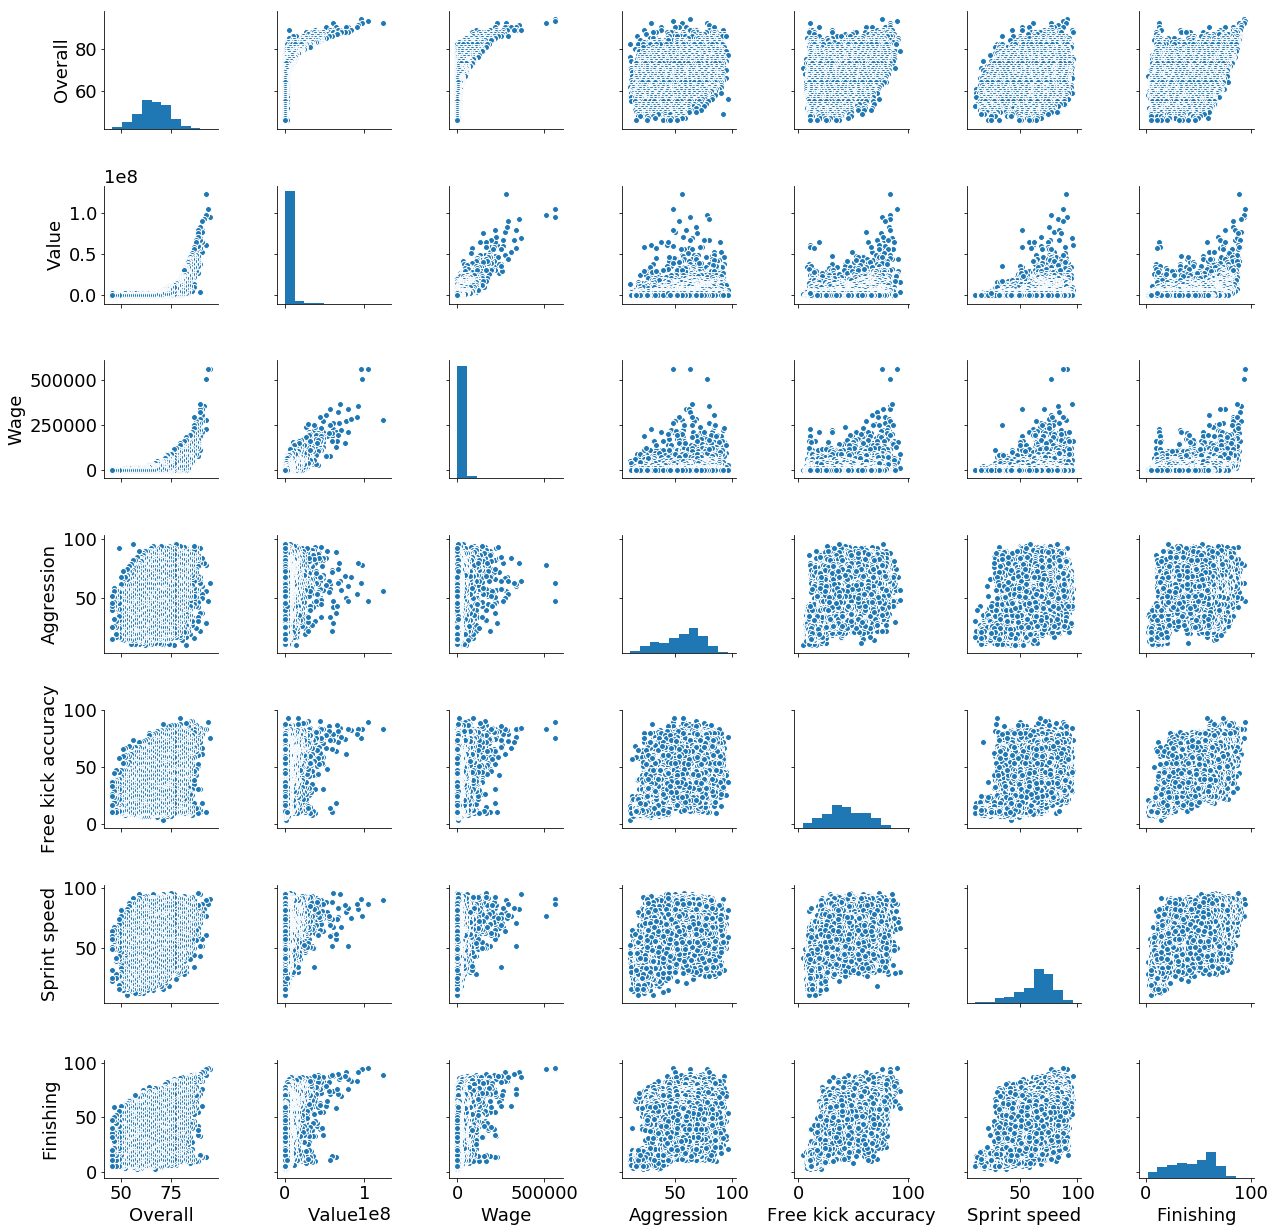

In [46]:
sns.pairplot(wdf);